In [1]:
import h5py
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2 as cv
import synth_text_dataset

%matplotlib inline

In [5]:
def apply_filters_to_image(img):
    img /= 255
    img = img.mean(axis=2)
    
    # Gaussian blur
    filter = cv.getGaussianKernel(5, 0.5)
    img = cv.filter2D(np.array(img, float), -1, filter)
    
    # Sharpening filter
    # filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    # img = cv.filter2D(np.array(img, float), -1, filter)
    
    # img = cv.Canny(np.array(img, np.uint8), 200, 250)
    
    # Edge detection
    # filter = np.full((7, 7), -1)
    # filter[len(filter) // 2, len(filter) // 2] = -filter.sum() - 1
    # img = cv.filter2D(np.array(img, float), -1, filter)
    
    # Median filter
    # img = cv.medianBlur(np.array(img, np.uint8), 5)
    
    # Blur filter
    # filter = np.ones((5, 5), np.float32)
    # filter /= filter.sum()
    # img = cv.filter2D(np.array(img, float), -1, filter)
    return img

def apply_filters_to_char(char_img):
    # Gaussian blur
    # filter = cv.getGaussianKernel(5, 0.5)
    # char_img = cv.filter2D(np.array(char_img, float), -1, filter)
    
    # Sharpening filter
    filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    char_img = cv.filter2D(np.array(char_img, float), -1, filter)
    
    # Edge detection
    # filter = np.full((7, 7), -1)
    # filter[len(filter) // 2, len(filter) // 2] = -filter.sum() - 1
    # char_img = cv.filter2D(np.array(char_img, float), -1, filter)
    
    # Median filter
    # char_img = torch.from_numpy(cv.medianBlur(np.array(char_img, np.uint8), 5)).int()
    
    # Blur filter
    # filter = np.ones((5, 5), np.float32)
    # filter /= filter.sum()
    # char_img = cv.filter2D(np.array(char_img, float), -1, filter)
    return char_img

[[[180. 171. 145.]
  [191. 174. 151.]
  [195. 175. 160.]
  ...
  [192. 165. 131.]
  [237. 218. 194.]
  [251. 243. 232.]]

 [[181. 172. 147.]
  [192. 175. 153.]
  [197. 176. 161.]
  ...
  [155. 125.  76.]
  [246. 238. 212.]
  [249. 242. 226.]]

 [[175. 169. 150.]
  [190. 176. 159.]
  [194. 177. 157.]
  ...
  [183. 158. 113.]
  [254. 248. 233.]
  [245. 239. 225.]]

 ...

 [[164. 162. 102.]
  [182. 180. 140.]
  [196. 190. 166.]
  ...
  [216. 211. 210.]
  [207. 203. 202.]
  [200. 189. 189.]]

 [[179. 172. 125.]
  [183. 182. 145.]
  [200. 194. 167.]
  ...
  [133. 117. 115.]
  [131. 120. 121.]
  [123. 115. 118.]]

 [[175. 170. 124.]
  [181. 180. 146.]
  [204. 199. 173.]
  ...
  [107.  87.  82.]
  [ 55.  36.  40.]
  [ 89.  57.  41.]]]
[[[180. 171. 145.]
  [191. 174. 151.]
  [195. 175. 160.]
  ...
  [192. 165. 131.]
  [237. 218. 194.]
  [251. 243. 232.]]

 [[181. 172. 147.]
  [192. 175. 153.]
  [197. 176. 161.]
  ...
  [155. 125.  76.]
  [246. 238. 212.]
  [249. 242. 226.]]

 [[175. 169. 150.]

C:\Users\Hanich\AppData\Local\Temp\ipykernel_17580\343260165.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(grid[:, 2])


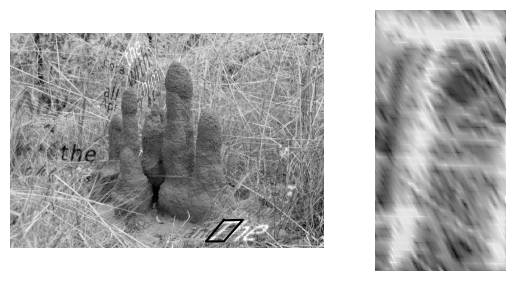

In [3]:
filename = 'Project/SynthText_train.h5'
dataset = synth_text_dataset.SynthTextCharactersDataset(filename, full_image_transform=apply_filters_to_image, on_get_item_transform=apply_filters_to_char)

data_samples = 1

for i in range(data_samples):
    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
    
    plt.figure()
    (img_name, charBB), font = dataset.get_item_raw(i)
    char_img, font = dataset[i]
    plt.title(font)
    
    img = dataset.get_image_data(img_name)
    
    plt.subplot(grid[:, 2])
    plt.axis('off')
    plt.imshow(char_img, 'gray')
    
    
    plt.subplot(grid[:, :2])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.plot(np.append(charBB[0], charBB[0, 0]), np.append(charBB[1], charBB[1, 1]), c='black')
    
    # plt.subplot(grid[:, 3])
    # plt.axis('off')
    # plt.imshow(char_img, cmap='gray')
    
    plt.show()
    

In [6]:
filename = 'Project/SynthText_train.h5'
import time
start = time.time()
dataset = synth_text_dataset.SynthTextCharactersDatasetRAM(filename, full_image_transform=apply_filters_to_image, on_get_item_transform=apply_filters_to_char)

x_items = dataset.x_items
y_items = dataset.y_items
print(f'Finished in {time.time() - start}')

print(x_items.shape)
print(y_items.shape)

Finished in 38.856348514556885
(30520, 200, 100)
(30520,)


mean.shape = (200, 100), std.shape = (200, 100)


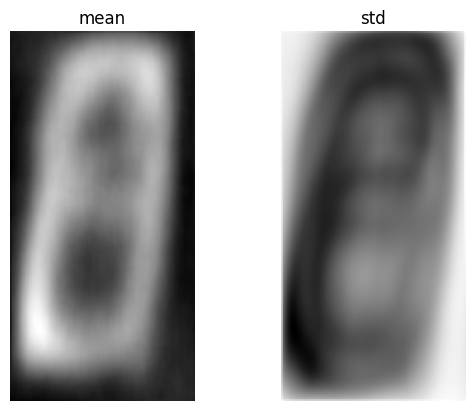

[[0.46867535 0.46870467 0.46874392 ... 0.46818    0.4682388  0.46890384]
 [0.46848664 0.46855742 0.46857598 ... 0.46802136 0.468131   0.46871182]
 [0.46835366 0.46841407 0.46849445 ... 0.46798113 0.46815708 0.46881345]
 ...
 [0.46722034 0.4674653  0.4674569  ... 0.46975413 0.46973705 0.4694203 ]
 [0.46718964 0.46744174 0.4673882  ... 0.46969244 0.4697103  0.469225  ]
 [0.4670154  0.46717837 0.46743038 ... 0.46954978 0.46939087 0.4689019 ]]


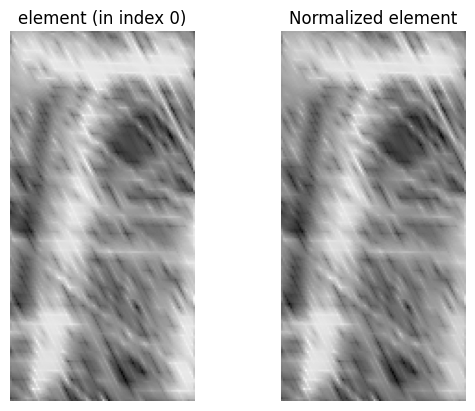

In [8]:
mean = x_items.mean(axis=0)
std = x_items.std(axis=0)

print(f'{mean.shape = }, {std.shape = }')

plt.figure()
plt.subplot(1,2,1)
plt.title('mean')
plt.axis('off')
plt.imshow(mean, cmap='gray')
plt.subplot(1,2,2)
plt.title('std')
plt.axis('off')
plt.imshow(std, cmap='gray')
plt.show()

idx = 0
plt.figure()
plt.subplot(1,2,1)
plt.title(f'element (in index {idx})')
plt.axis('off')
plt.imshow(x_items[idx], cmap='gray')
plt.subplot(1,2,2)
plt.title(f'Normalized element')
plt.axis('off')
plt.imshow((x_items[0] - mean) / std, cmap='gray')
plt.show()
